# Descomposición Single Level de una señal y su reconstrucción:
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### Este notebook es una continuación directa del notebook sobre fundamentos del análisis de onduletas en procesamiento de señales, y el notebook sobre bancos de filtros.

### La descomposición de nivel único (Single Level Decomposition) asociada los filter banks de una ondulera discreta implica el uso de dos pares de filtros: un filtro pasa bajas (low-pass) y un filtro pasa altas (high-pass), abordados en  el notebook sobre bancos de filtros. El objetivo de este proceso es dividir la señal en dos partes, los coeficientes de aproximación y los coeficientes de detalle.

### El filtro pasa bajas que se aplica a la señal original, captura las frecuencias bajas (lo cual es lo que se denomina la componente de aproximación); mientras que el filtro pasa altas captura las frecuencias altas (componente de detalle). 

### Este notebook tiene como objetivo ejemplificar lo anterior.

### En el notebook sobre fundamentos del análisis de onduletas habíamos definido una formulación ortogonal del  análisis de multi resolución (MRA) mediante cinco propiedades, donde abordademos nuevamente la quinta propiedad sobre la base del subespacio $V_0$ y la existencia de una función de escalamiento:

<font size="5"> 5) $\exists \phi (t) \in V_0 \subset \mathbf{L}_2 (\mathbb{R}), \forall m \in \mathbb{Z}$ tal que $\{\phi _{mn} (t)=2^{-m/2}\phi (2^{-m} t-n)\}$ es una base ortonormal para el subespacio $V_m$, es decir, $\int \phi _{mn} (t) \phi _{mn'} (t) dt=\delta_{n-n'}$</font>.

### Definimos la ecuación de refinamiento como:

<font size="5"> $\phi (t)=  \sum _{n \in \mathbb{Z}} \sqrt{2} \cdot h_0(n)\phi (2t-n), \forall t \in \mathbb{R}, h(n) \in \mathscr{L} _2 (\mathbb{Z})$ </font> 

### Y similarmente:

<font size="5"> $\psi (t)=  \sum _{n \in \mathbb{Z}} \sqrt{2} \cdot h_1(n)\psi (2t-n), \forall t \in \mathbb{R}, h(n) \in \mathscr{L} _2 (\mathbb{Z})$ </font> 

### Al conjunto $h(n)$ se le conoce como los coeficientes de la función de escalamiento:

<font size="5"> $h_0(n)=\frac{\delta _n + \delta _{n-1}}{2}$ (pasa bajas), $h_1(n)=\frac{\delta _n - \delta _{n-1}}{2} $ (pasa altas) </font> 

### Recordando que cualquier función $f(t) \in V_0$ puede ser expresada en términos de la onduleta padre:

<font size="5"> $f(t)=\sum _{n=-\infty}^{\infty} C_n \phi (t-n) $, </font> 



### Entonces a escala $m$, los coeficientes de escalamiento es el conjunto:

<font size="5"> $C_{m,n}=\langle f(t) , \phi _{mn} (t) \rangle=2^{-m/2} \int _{2^m n}^{2^m (n+1)} f(t) dt$ </font> 

### Y en términos de la onduleta madre:

<font size="5"> $D_{m,n}=\langle f(t) , \psi _{mn} (t)\rangle$ </font> 

### En donde:

<font size="5"> $f(t)= \sum _{m,n} D_{m,n} \psi _{m,n} (t)$ </font> 


# Ok, ya tengo esta información, ¿ahora qué?:

### La transformada de onduleta discreta nos permite reconstruir una señal analógica ($f(t)$). Este proceso requiere de la onduleta madre ($\psi$) y de la onduleta padre ($\phi$) (función de escalamiento). De toda la teoría anterior, la reconstrucción de la señal puede ser representada mediante la ecuación ecuación:

<font size="5"> $f(t)= \sum _{m,n} C_{m,n} \phi  (t) + \sum _{m,n}D_{m,n} \psi _{m,n} (t) $ </font> 

### En resumen:

### Los coeficientes $C_{m,n}$ son los coeficientes de aproximación, se asocian a $\phi$ y corresponden al filtro pasa bajas. Por otro lado, los coeficientes $D_{m,n}$ son los coeficientes de aproximación, se asocian a $\psi$ y corresponden al filtro pasa altas. 

# Ejercicio:

### Vamos a aplicar los procesos de descomposición de nivel único y de reconstrucción a dos señales, mostrando gráficamente los coeficientes de aproximación y de detalle y la reconstrucción. Se usará una onduleta discreta de la familia Symlet como onduleta madre (symlet 2 en Python).

### La primer señal de entrada va a estar dada por el siguiente arreglo:


$ x_1(n)= \begin{pmatrix}
1 \\
2 \\
3 \\
4 \\
5 \\
6 \\
7 \\
8 \\
9 \\
10 \\
11 \\
12 \\
13 \\
14 \\
\end{pmatrix}$ 

### La segunda señal va a ser una onda tipo chirp de frecuencia lineal (no tengo memoria de haber visto una traducción al español en este caso, pero supongo que sería algo como *onda chirriante*).

### La frecuencia en este tipo de señales, las cuales son sinusoidales, varía de una forma lineal $\nu (t)= ct+\nu _0 $, en donde $\nu _0 =\nu (t=0)$ y $c=\frac{\Delta \nu}{\Delta t}=\frac{\nu _1 - \nu _0}{t_1 - t_0}$, por lo que su forma general está representada analíticamente como:

<font size="5"> $x_2(t)= Asen(2\pi (\frac{c}{2}t^2 +\nu_0 t)+\phi _0) $ </font> 

### Vamos a definir sus parámetros en el programa.



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
import pywt
from matplotlib import style
style.use('dark_background')

In [10]:
x1=np.arange(1,15)
x1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Coeficientes de la señal $x_1$:

In [18]:
# Definimos los coeficientes asociados:
(CA,CD)=pywt.dwt(x1, 'sym2', mode = 'symmetric') # Los argumentos son (señal de entrada , onduleta madre , modo de extensión)
# CA con los coeficientes de aproximación C_{m,n} ; CD son los de detalle D_{m,n}
print('Coeficientes de aproximación C_{m,n}: \n',CA)
print("--------------------------------------------------")
print('Coeficientes de detalle D_{m,n}: \n',CD)

Coeficientes de aproximación C_{m,n}: 
 [ 1.76776695  2.31078903  5.13921616  7.96764328 10.79607041 13.62449753
 16.45292466 19.44543648]
--------------------------------------------------
Coeficientes de detalle D_{m,n}: 
 [-6.12372436e-01 -9.90180160e-13 -9.90874049e-13 -9.89874849e-13
 -9.91318139e-13 -9.90540983e-13 -9.91207116e-13  6.12372436e-01]


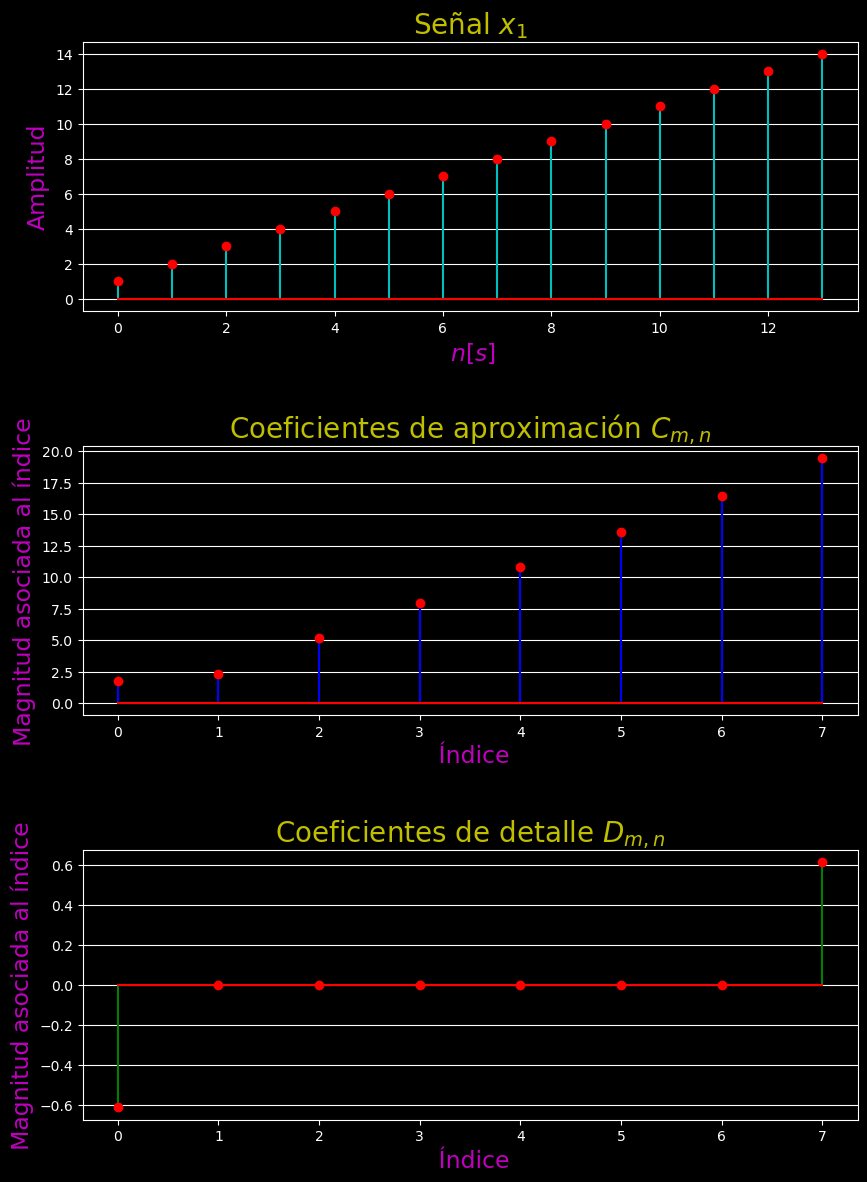

In [80]:
plt.figure(figsize = (10,14))

#Gráfico de la señal de entrada
plt.subplot(3,1,1)
plt.stem(x1, linefmt='c-', markerfmt='ro', basefmt='r-')
plt.title("Señal $x_1$", fontsize = 20, color="y")
plt.xlabel(" $n [s]$", fontsize=17, color="m")
plt.ylabel("Amplitud", fontsize=17, color="m")
plt.grid(True,axis="y")

#Gráfico de C _m,n:
plt.subplot(3,1,2)
plt.stem(CA, linefmt='b-', markerfmt='ro', basefmt='r-')
plt.title("Coeficientes de aproximación $C_{m,n}$", fontsize = 20, color="y")
plt.xlabel(" Índice", fontsize=17, color="m")
plt.ylabel("Magnitud asociada al índice", fontsize=17, color="m")
plt.grid(True,axis="y")

#Gráfico de D_m,n:
plt.subplot(3,1,3)
plt.stem(CD, linefmt='g-', markerfmt='ro', basefmt='r-')
plt.title("Coeficientes de detalle $D_{m,n}$", fontsize = 20, color="y")
plt.xlabel(" Índice", fontsize=17, color="m")
plt.ylabel("Magnitud asociada al índice", fontsize=17, color="m")
plt.grid(True,axis="y")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Reconstrucción de $x_1$ con base a los coeficientes:

In [60]:
x1_reconstruida=pywt.idwt(CA, CD, 'sym2', mode = 'symmetric')
x1_reconstruida

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

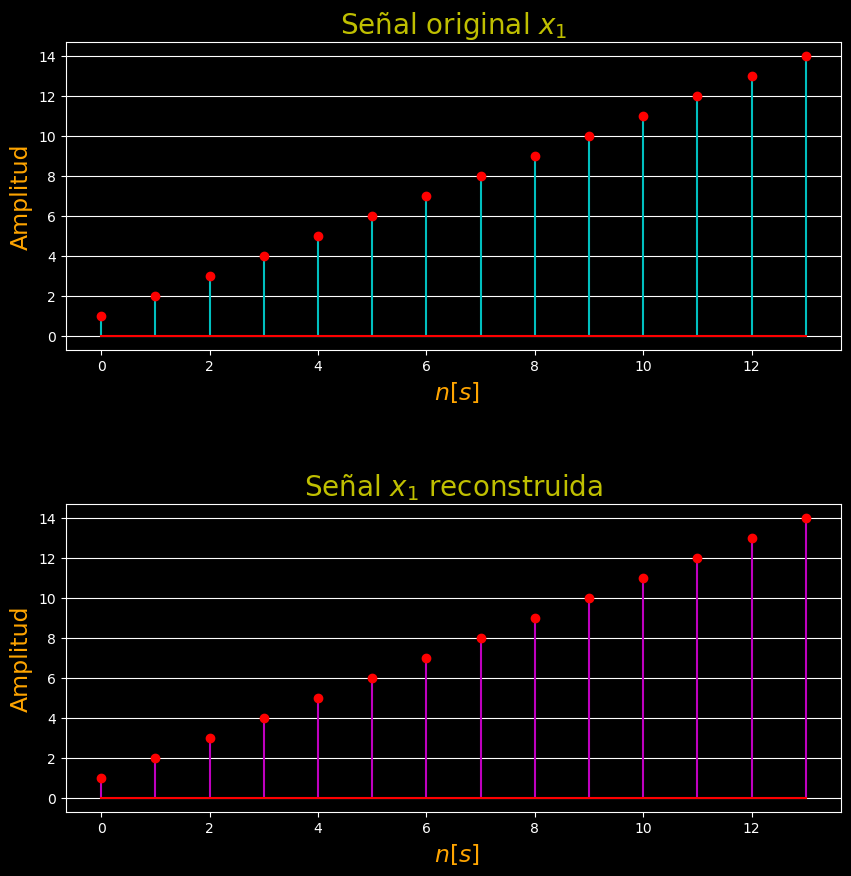

In [81]:
plt.figure(figsize = (10,10))

#Gráfico de la señal original:
plt.subplot(2,1,1)
plt.stem(x1, linefmt='c-', markerfmt='ro', basefmt='r-')
plt.title("Señal original $x_1$", fontsize = 20, color="y")
plt.xlabel(" $n [s]$", fontsize=17, color="orange")
plt.ylabel("Amplitud", fontsize=17, color="orange")
plt.grid(True,axis="y")

#Gráfico de la reconstrucción:
plt.subplot(2,1,2)
plt.stem(x1_reconstruida, linefmt='m-', markerfmt='ro', basefmt='r-')
plt.title("Señal $x_1$ reconstruida", fontsize = 20, color="y")
plt.xlabel(" $n [s]$", fontsize=17, color="orange")
plt.ylabel("Amplitud", fontsize=17, color="orange")
plt.grid(True,axis="y")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Coeficientes de la señal chirp $x_2$:

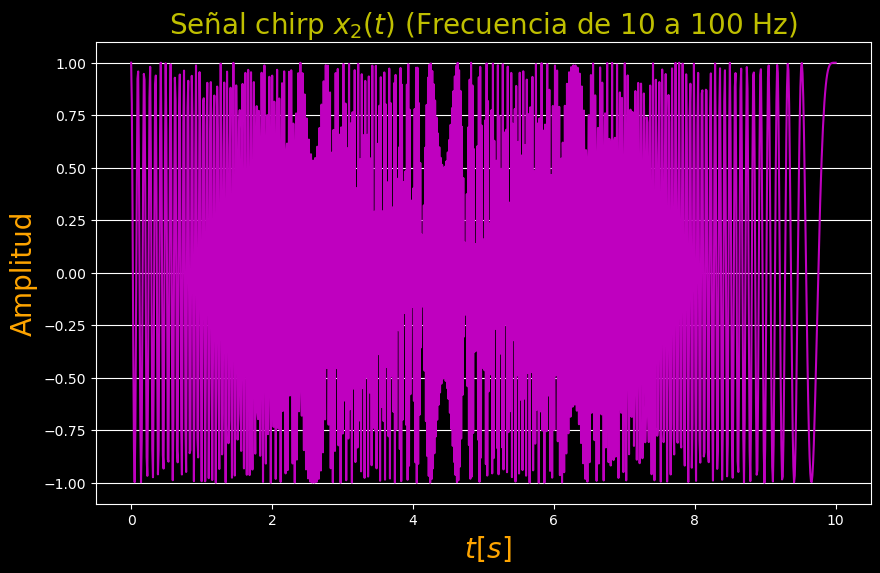

In [88]:
#Parámetros de x2:
t = np.linspace(0, 10, 1000)  # Rango temporal (de 0 a 10 segundos)
frecuencia_inicial = 10  # Frecuencia a tiempo t=0, f0= 10 Hz
tiempo_final=10 #t1=10s
frecuencia_final = 100  # Frecuencia a un tiempo t, f1= 100 Hz

#Generación de x2:
x2= chirp(t, f0=frecuencia_inicial, f1=frecuencia_final, t1=tiempo_final, method='linear')

#Gráfico de la señal original x2:
plt.figure(figsize=(10, 6))
plt.plot(t, x2,"m")
plt.title('Señal chirp $x_2 (t)$ (Frecuencia de 10 a 100 Hz)', fontsize = 20, color="y")
plt.xlabel(" $t [s]$", fontsize=17, color="orange")
plt.ylabel("Amplitud", fontsize=17, color="orange")
plt.grid(True,axis="y")
plt.show()

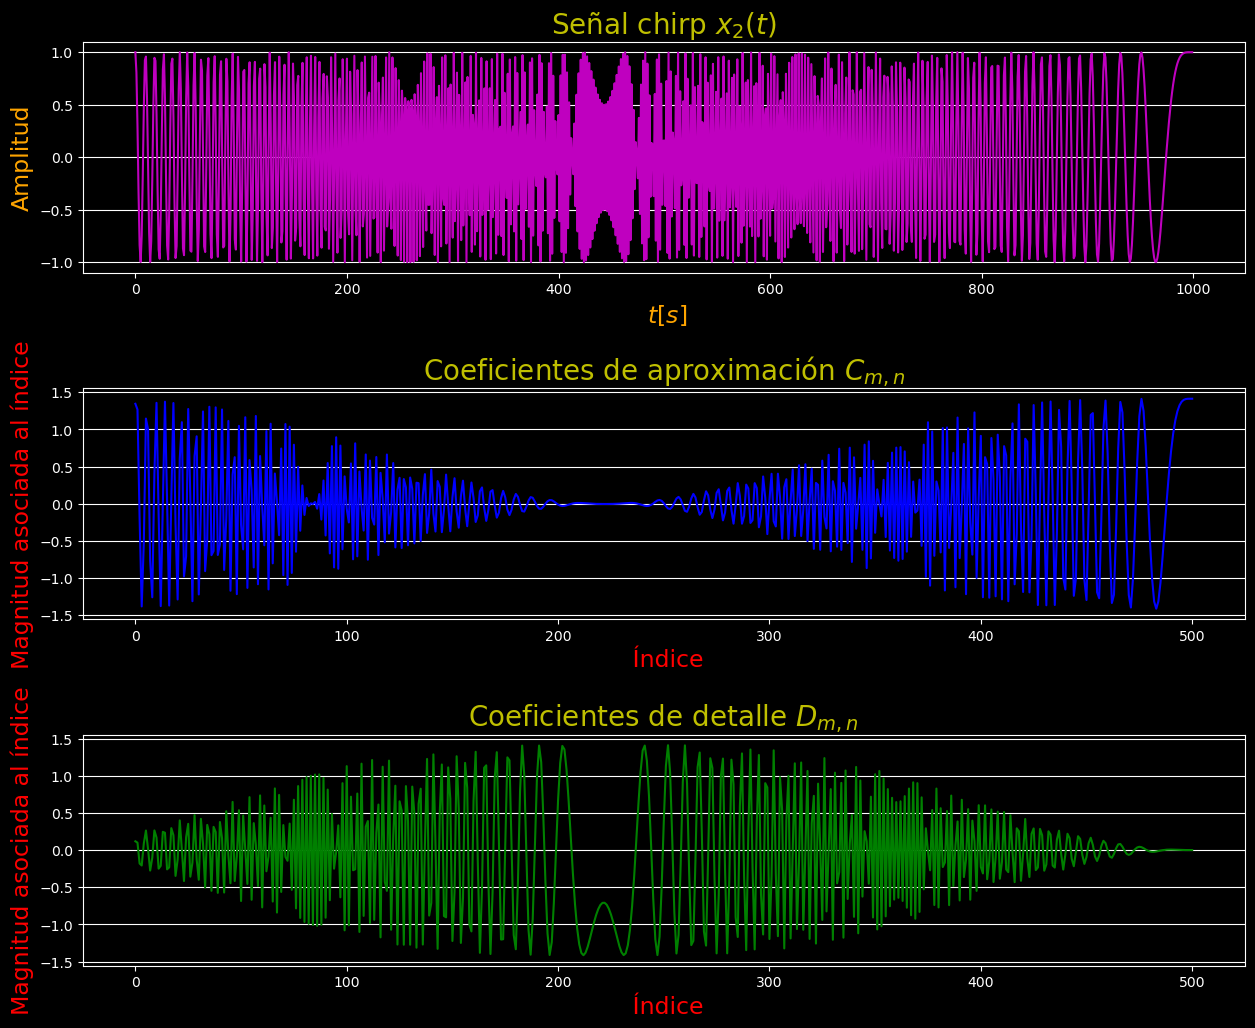

In [102]:

(CA2,CD2) = pywt.dwt(x2,'sym2',mode = 'symmetric')

plt.figure(figsize = (15,12))

#Gráfico de x2:
plt.subplot(3,1,1)
plt.plot(x2, 'm')
plt.title('Señal chirp $x_2 (t)$', fontsize = 20, color="y")
plt.xlabel(" $t [s]$", fontsize=17, color="orange")
plt.ylabel("Amplitud", fontsize=17, color="orange")
plt.grid(True,axis="y")

#Gráfico de C _m,n:
plt.subplot(3,1,2)
plt.plot(CA2, 'b')
plt.title("Coeficientes de aproximación $C_{m,n}$", fontsize = 20, color="y")
plt.xlabel(" Índice", fontsize=17, color="r")
plt.ylabel("Magnitud asociada al índice", fontsize=17, color="r")
plt.grid(True,axis="y")

#Gráfico de D _m,n:
plt.subplot(3,1,3)
plt.plot(CD2, 'g')
plt.title("Coeficientes de detalle $D_{m,n}$", fontsize = 20, color="y")
plt.xlabel(" Índice", fontsize=17, color="r")
plt.ylabel("Magnitud asociada al índice", fontsize=17, color="r")
plt.grid(True,axis="y")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Reconstrucción de $x_2$ con base a los coeficientes:

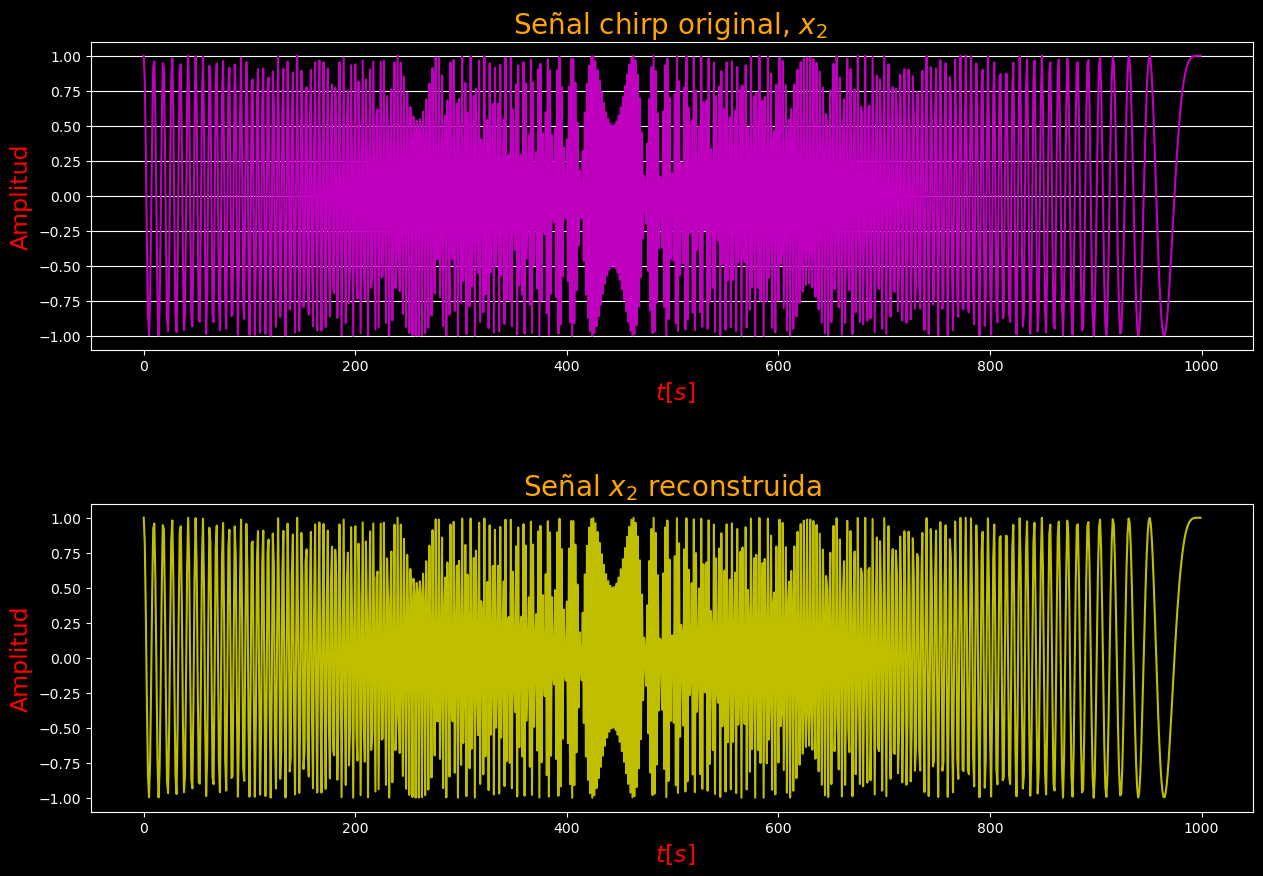

In [110]:
x2_reconstruida=pywt.idwt(CA2, CD2, 'sym2', mode = 'symmetric')

#Gráfico de x2 original:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(x2, 'm')
plt.title("Señal chirp original, $x_2$ ", fontsize = 20, color="orange")
plt.xlabel(" $t [s]$", fontsize=17, color="r")
plt.ylabel("Amplitud", fontsize=17, color="r")
plt.grid(True,axis="y")

#Gráfico de x2 reconstruida:
plt.subplot(2,1,2)
plt.plot(x2_reconstruida, 'y')
plt.title("Señal $x_2$ reconstruida", fontsize = 20, color="orange")
plt.xlabel(" $t [s]$", fontsize=17, color="r")
plt.ylabel("Amplitud", fontsize=17, color="r")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Fin del ejercicio.

# Bibliografía recomendada:

### $\blacksquare$ Akansu, A. N. (2001). Multiresolution signal decomposition: Transforms, subbands, and wavelets (2nd ed.). Elsevier.

### $\blacksquare$ Percival, D. B., & Walden, A. T. (2013). Wavelet methods for time series analysis. Cambridge University Press.

### $\blacksquare$ Nguyen, T., & Strang, G. (1996). Wavelets and filter banks (2nd ed.). Wellesley College.

### $\blacksquare$ Debnath, L., & Shah, F. A. (2015). Wavelet transforms and their applications. Birkhäuser Boston: Birkhäuser.

### $\blacksquare$ Bhatnagar, N. (2020). Introduction to wavelet transforms. Chapman and Hall/CRC.